In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


In [2]:
iris=pd.read_csv("../input/Iris.csv")

In [3]:
iris.head(5)
iris.info()
iris.Species.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.drop('Id',axis=1,inplace=True)

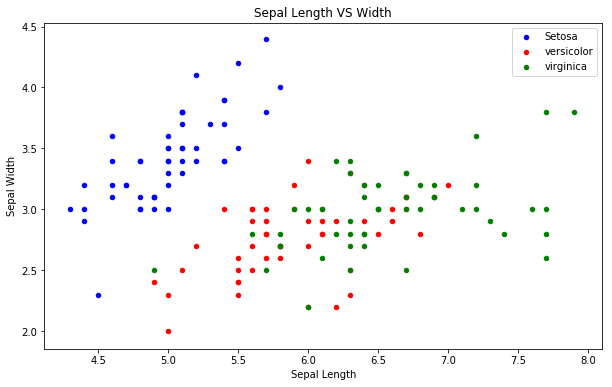

In [5]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

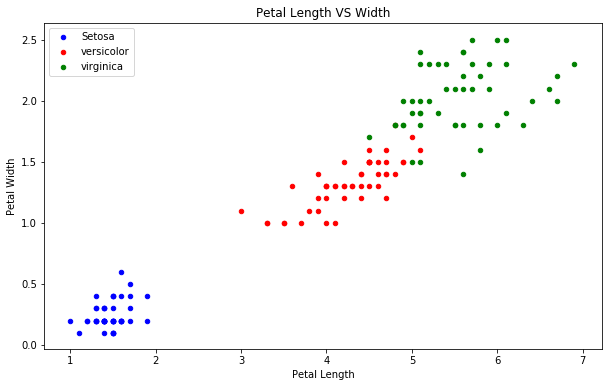

In [6]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


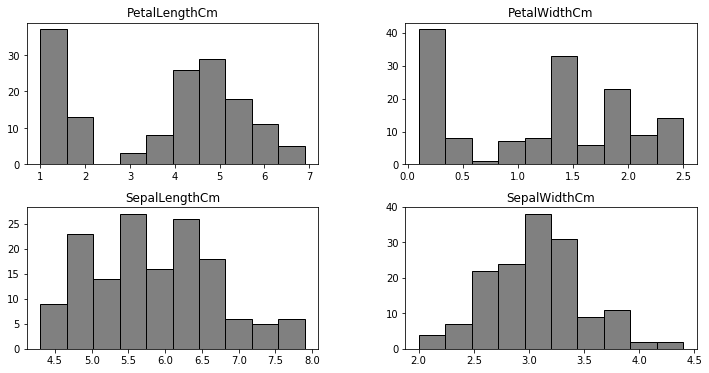

In [7]:
iris.hist(edgecolor='black',linewidth=1,grid=False,color='grey')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

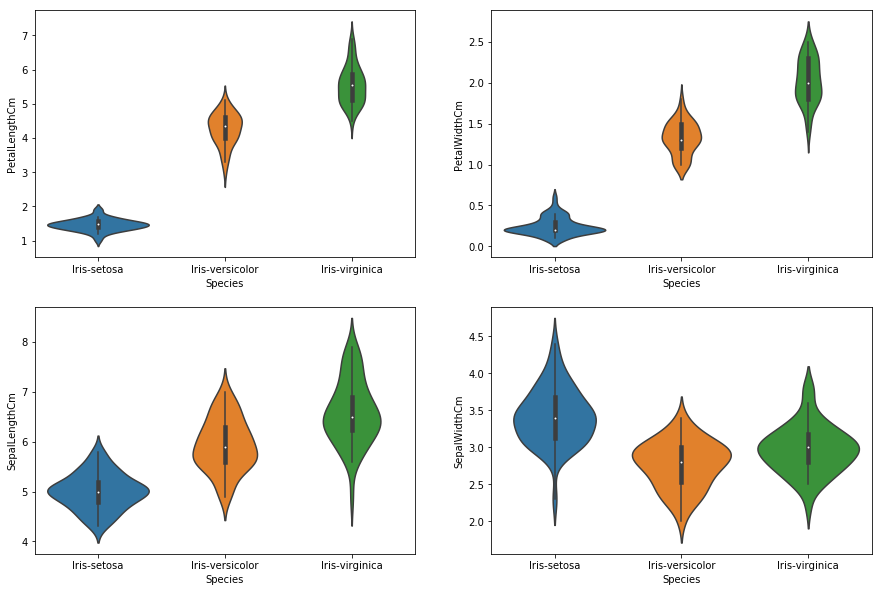

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

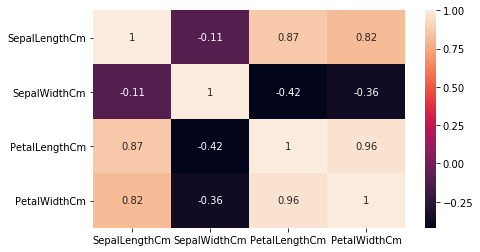

In [10]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True)
plt.show()

In [11]:
y_iris=iris.Species
x_iris=iris.drop(columns='Species')
print(x_iris.head())
print(y_iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.4, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [13]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


In [14]:
y_train.head()

123     Iris-virginica
24         Iris-setosa
25         Iris-setosa
23         Iris-setosa
94     Iris-versicolor
Name: Species, dtype: object

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (Logistic Regression) : ',accuracy)

Accuracy (Logistic Regression) :  0.9666666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
predicted=model.predict(X_test)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (KNN) : ',accuracy)
print(confusion_matrix(y_test,predicted))

Accuracy (KNN) :  0.9833333333333333
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [17]:
#Support Vector Machines
from sklearn.svm import SVC
model=SVC(gamma='auto')
model.fit(X_train,y_train)
predicted=model.predict(X_test)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (SVC) : ',accuracy)

Accuracy (SVC) :  1.0


In [18]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (Decission Tree) : ',accuracy)

Accuracy (Decission Tree) :  0.9666666666666667


Now, trying the models with only two features which are least correlated among all 4 features. 
Features that i will use now : Petal Width and Sepal Width

In [19]:
X_train2=X_train.drop(columns=['SepalLengthCm','PetalLengthCm'])
X_train2.head()

,SepalWidthCm,PetalWidthCm
123,2.7,1.8
24,3.4,0.2
25,3.0,0.2
23,3.3,0.5
94,2.7,1.3


In [20]:
X_test2=X_test.drop(columns=['SepalLengthCm','PetalLengthCm'])
X_test2.head()

,SepalWidthCm,PetalWidthCm
73,2.8,1.2
18,3.8,0.3
118,2.6,2.3
78,2.9,1.5
76,2.8,1.4


In [21]:
#Logistic Regression
model=LogisticRegression()
model.fit(X_train2,y_train)
predicted=model.predict(X_test2)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (Logistic Regression) : ',accuracy)

Accuracy (Logistic Regression) :  0.9


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
#K Nearest Neighbors
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train2,y_train)
predicted=model.predict(X_test2)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (KNN) : ',accuracy)
print(confusion_matrix(y_test,predicted))

Accuracy (KNN) :  0.9833333333333333
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [23]:
#Support Vector Machines
model=SVC(gamma='auto')
model.fit(X_train2,y_train)
predicted=model.predict(X_test2)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (SVC) : ',accuracy)
print(confusion_matrix(y_test,predicted))

Accuracy (SVC) :  0.9833333333333333
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [24]:
#Decission Tree
model=DecisionTreeClassifier()
model.fit(X_train2,y_train)
predicted=model.predict(X_test2)
accuracy=metrics.accuracy_score(predicted,y_test)
print('Accuracy (Decission Tree) : ',accuracy)

Accuracy (Decission Tree) :  0.9333333333333333
